In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import itertools
import os
import pickle
import numpy as np 
os.chdir('/home/emi/unipd/Sartori_CBSD/project/cbsdproject')
import topic_analysis as ta

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
PARTY_NAMES = ['Undefined', 'Lega-Salvini', 'Partito Democratico',
               'Fratelli d\'Italia', 'Movimento 5 Stelle', 'Forza Italia ']

In [14]:
def get_top_words_per_cluster(model, terms, labels, n_terms=10):
    total = len(labels)
    clusters, counts_elements = np.unique(labels, return_counts=True)
    counts_elements  = np.divide(counts_elements, total)
    clusters_weights = dict(zip(clusters, counts_elements))
    topics = []
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    for i in clusters:
        words = []        
        weights = []
        for ind in order_centroids[i, :n_terms]:
            words.append(terms[ind])
            weights.append(model.cluster_centers_[i, ind])
        weights = np.array(weights)
        weights /= np.sum(weights)
        topic = (clusters_weights[i], list(zip(words, weights)))
        topics.append(topic)   
    return topics

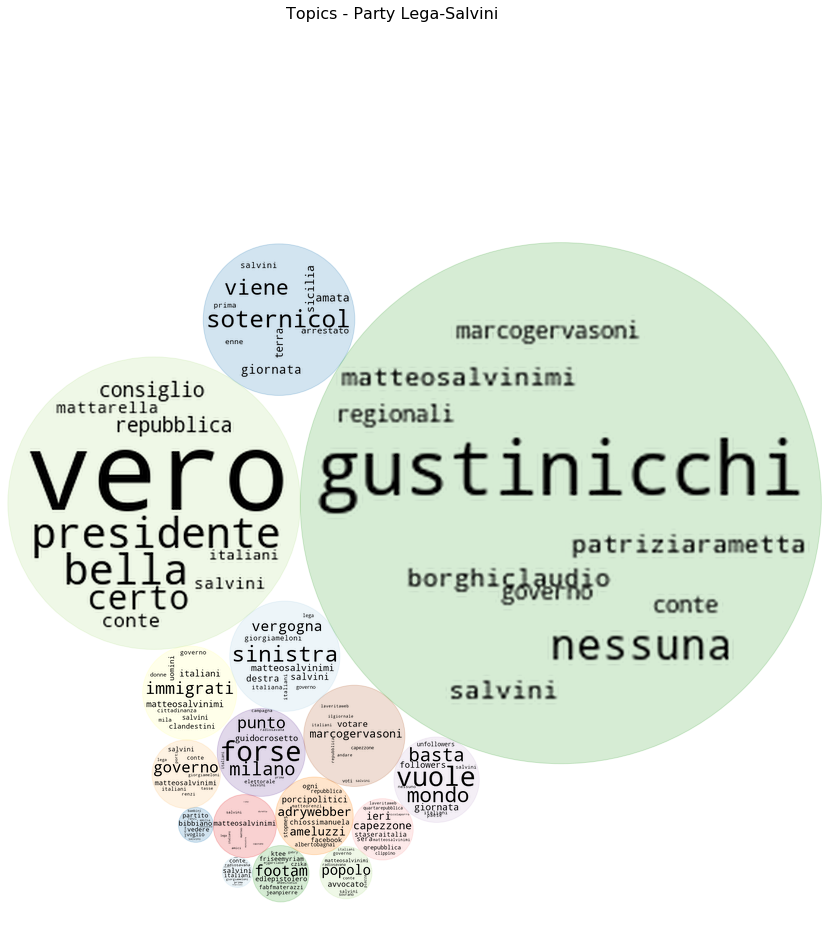

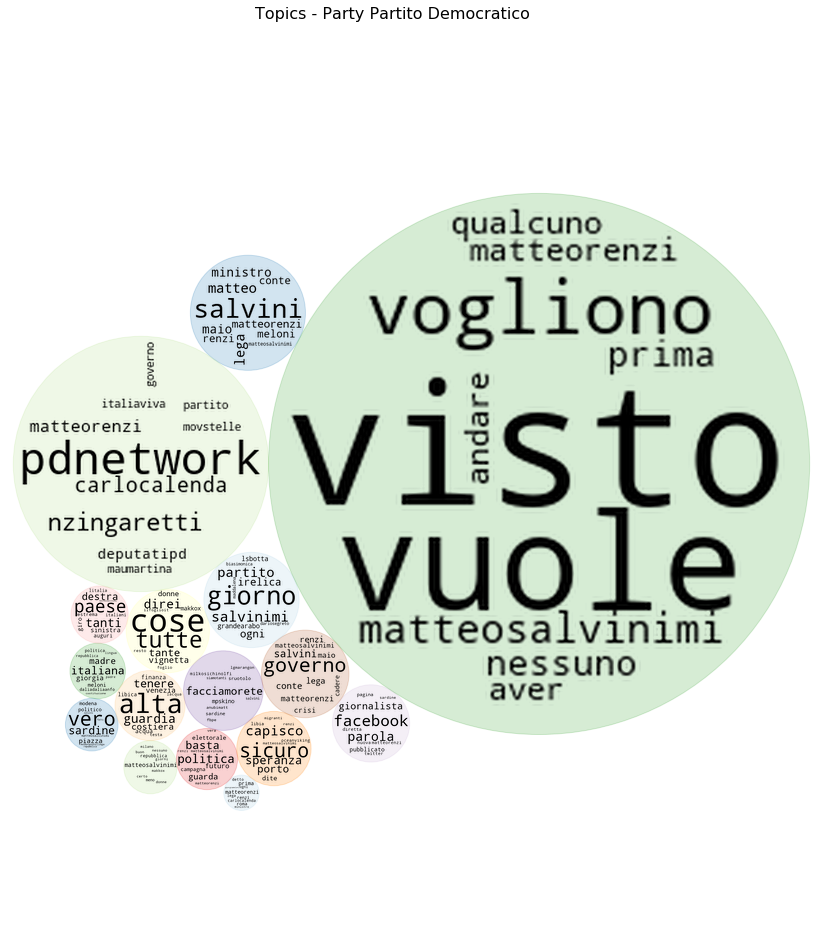

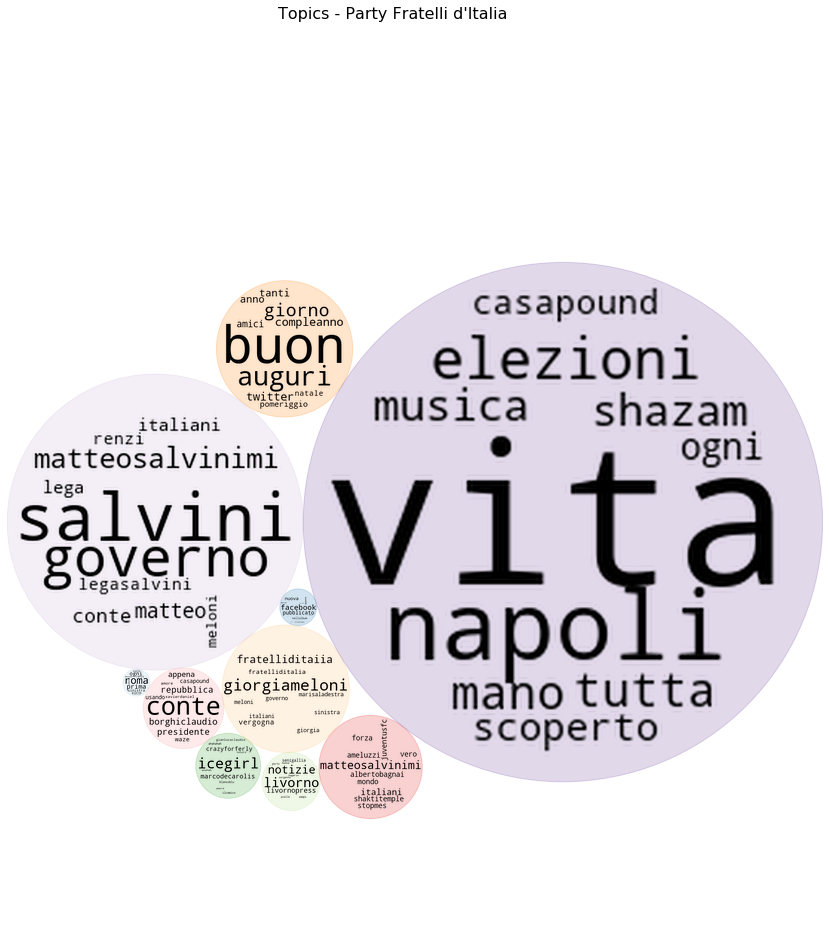

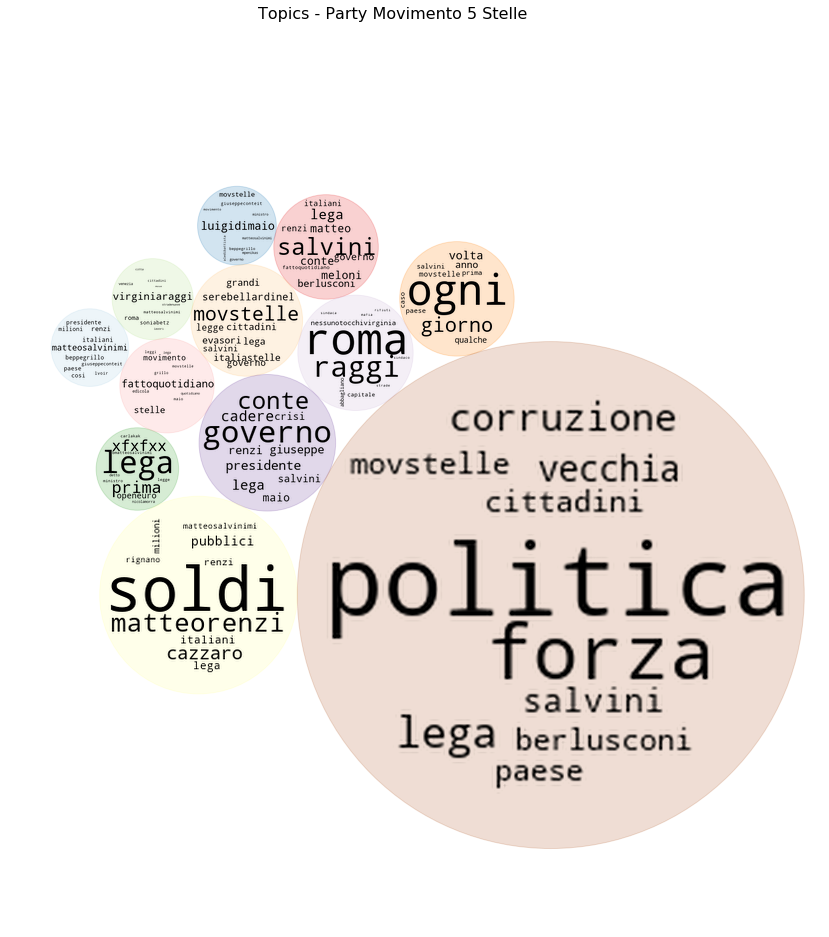

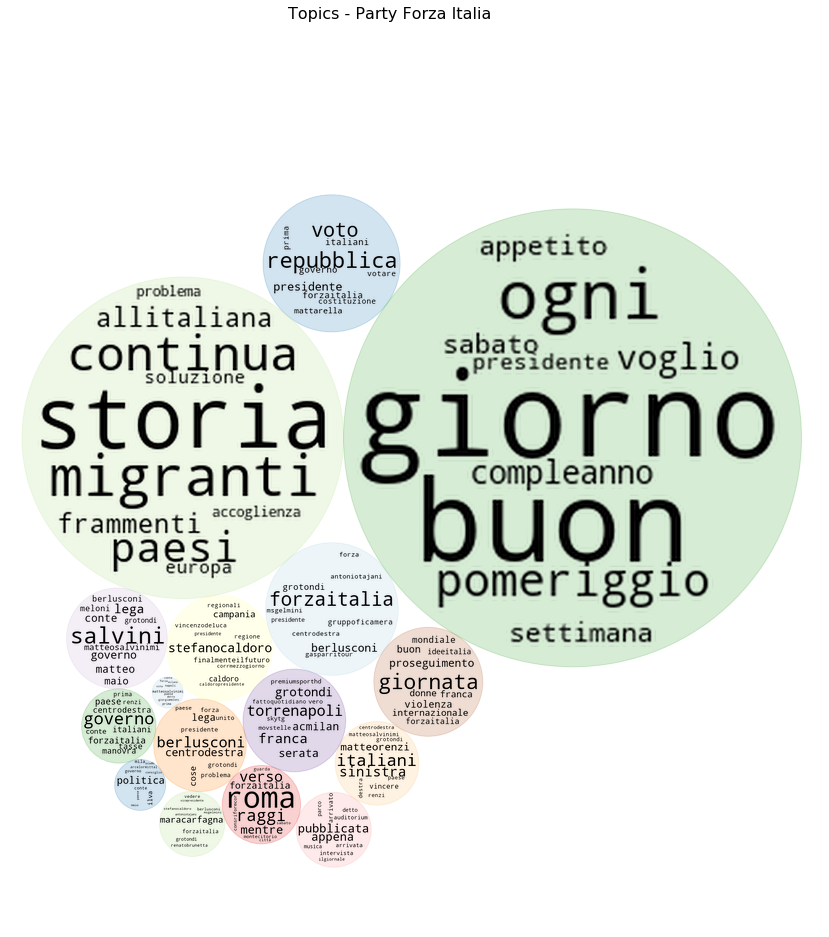

In [15]:
parties={1:16,2:16,3:10,4:12, 5:16}
for party in parties.keys():
    file = open(f'models/model_kmeanstfidf_k{parties[party]}_party{party}.pkl', 'rb')
    model = pickle.load(file)
    file = open(f'models/vect_kmeanstfidf_k{parties[party]}_party{party}.pkl', 'rb')
    vect = pickle.load(file)
    terms = vect.get_feature_names()
    file = open(f'models/labels_kmeanstfidf_k{parties[party]}_party{party}.pkl', 'rb')
    labels = pickle.load(file)
    cluster_info = get_top_words_per_cluster(model, terms, labels, n_terms=10)
    fig = ta.topic_cloud(cluster_info)
    fig.suptitle(f'Topics - Party {PARTY_NAMES[party]}', fontsize=16)
    fig.show()
    fig.savefig(f'figures/topics_kmeanstfidf_k{parties[party]}_party{party}.png', bbox_inches='tight')